In [1]:
import os
path = os.path.abspath(os.path.join('..'))
print(path)
import sys

sys.path.insert(0,path)
print(sys.executable)

/home/scuervo/Documents/dev/dcapy
/home/scuervo/anaconda3/envs/res/bin/python


In [2]:
from dcapy import dca
import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

# dcapy Basis Examples to try

## Basics Equations

First Section will explore the Arps Declination Analysis equations. 
Starting from Equations used to calculate rate then cumulatives.

The library numpy is used to performed the majority of operations

### Exponential b = 0, Examples

The time array used with this function is relative to a Initial Time which is always 0

In [3]:
time1 = [0,2,3,4,10]
qi1 = 500
di1 = 0.3 
dca.arps_exp_rate(time1,qi1,di1)

array([500.        , 274.40581805, 203.28482987, 150.59710596,
        24.89353418])

Cumulative volume can be calculated  for any timestep

In [4]:
dca.arps_exp_cumulative(time1,qi1,di1)


array([   0.        ,  751.98060651,  989.0505671 , 1164.67631348,
       1583.68821939])

### Hyperbolic 0<b<1, Examples

The time array used with this function is relative to a Initial Time which is always 0

In [5]:
b = 0.5
dca.arps_hyp_rate(time1,qi1,di1,b)

array([500.        , 295.85798817, 237.81212842, 195.3125    ,
        80.        ])

In [6]:
dca.arps_hyp_cumulative(time1,qi1,di1,b,ti=0)

array([  -0.        ,  769.23076923, 1034.48275862, 1250.        ,
       2000.        ])

### Armonic, Examples

The time array used with this function is relative to a Initial Time which is always 0

In [7]:
b = 1
dca.arps_hyp_rate(time1,qi1,di1,b)

array([500.        , 312.5       , 263.15789474, 227.27272727,
       125.        ])

In [8]:
dca.arps_arm_cumulative(time1,qi1,di1,b,ti=0)

array([   0.        ,  783.33938208, 1069.75647695, 1314.09560061,
       2310.49060187])

## Use arps_forecast and arps_cumulative 
independently of the b. It internally uses the appropiate equation

In [9]:
print('Examples Arps Forecast function')

print('Example 1. Single Values')
time1 = [0,2,4,6]
qi1 = 500,
di1 = 0.3
b1 = 0 
f1 = dca.arps_forecast(time1,qi1,di1,b1)
print('Forecast Example 1')
print(f1)


Examples Arps Forecast function
Example 1. Single Values
Forecast Example 1
[500.         274.40581805 150.59710596  82.64944411]


/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)


In [10]:
dca.arps_cumulative(time1,qi1,di1,b1)

/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


array([   0.        ,  751.98060651, 1164.67631348, 1391.16851963])

In [11]:
print('\nExample 2. Multiple values')
time2 = [0,2,4,6]
qi2 = [600,700,900]
di2 = 0.3
b2 = [0,0.5,1]
print(f' ->Time array {time2}\n ->qi {qi2}\n -> di {di2}\n b {b2}')    
f2 = dca.arps_forecast(time2,qi2,di2,b2)
print('Forecast Example 2')
print(f2)
f2.shape


Example 2. Multiple values
 ->Time array [0, 2, 4, 6]
 ->qi [600, 700, 900]
 -> di 0.3
 b [0, 0.5, 1]
Forecast Example 2
[[600.         700.         900.        ]
 [329.28698166 414.20118343 562.5       ]
 [180.71652715 273.4375     409.09090909]
 [ 99.17933293 193.90581717 321.42857143]]


(4, 3)

In [12]:
dca.arps_cumulative(time2,qi2,di2,b2)

/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:96: RuntimeWarning: divide by zero encountered in true_divide
  f = qi/(di*(b-1))
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:99: RuntimeWarning: invalid value encountered in multiply
  return f*(g-h)


array([[   0.        ,   -0.        ,    0.        ],
       [ 902.37672781, 1076.92307692, 1410.01088774],
       [1397.61157618, 1750.        , 2365.37208109],
       [1669.40222356, 2210.52631579, 3088.85825154]])

# Arps Class

In [13]:
print('Example Arps Class')
#print(dca.time_converter_matrix)
qi = 5000
di = 0.3
b = 0
ti = 0
di_f = 'A'
dc = dca.Arps(qi,di,b,ti,freq_di=di_f)
print(dc)

Example Arps Class
Declination 
 Ti: 0 
 Qi: 5000 bbl/d 
 Rate: 0.3 A 
 b: 0


Calculate Daily Basis each day
            rate    cumulative
355  3734.661146  1.539496e+06
356  3731.592823  1.543229e+06
357  3728.527020  1.546959e+06
358  3725.463736  1.550686e+06
359  3722.402969  1.554410e+06
360  3719.344717  1.558131e+06
361  3716.288977  1.561848e+06
362  3713.235748  1.565563e+06
363  3710.185028  1.569275e+06
364  3707.136813  1.572984e+06


/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


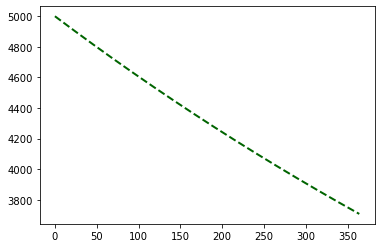

In [14]:
print('Calculate Daily Basis each day')
#print(dc.forecast(start=0,end=1000,freq_input='D',freq_output='D'))
dd = dc.forecast(start=0,end=365,freq_input='D',freq_output='D')
print(dc.forecast(start=0,end=365,freq_input='D',freq_output='D').tail(10))
dc.plot(start=0,end=365,freq_input='D',freq_output='D')

Calculate Daily Basis each Month
            rate    cumulative
0    5000.000000  0.000000e+00
30   4878.219897  1.481658e+05
60   4759.405873  2.927229e+05
90   4643.485686  4.337591e+05
120  4530.388854  5.713602e+05
150  4420.046610  7.056100e+05
180  4312.391864  8.365899e+05
210  4207.359159  9.643797e+05
240  4104.884633  1.089057e+06
270  4004.905979  1.210698e+06
300  3907.362406  1.329376e+06
330  3812.194607  1.445163e+06
360  3719.344717  1.558131e+06


/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


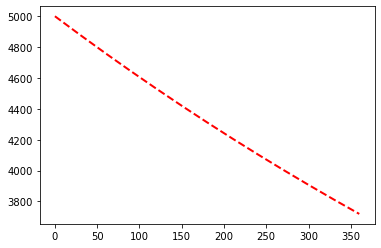

In [15]:
print('Calculate Daily Basis each Month')
print(dc.forecast(start=0,end=365,freq_input='D',freq_output='M'))
dc.plot(start=0,end=365,freq_input='D',freq_output='M',rate_kw={'color':'red'})


Calculate Daily Basis each Year
            rate    cumulative
0    5000.000000  0.000000e+00
365  3704.091103  1.576689e+06


/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


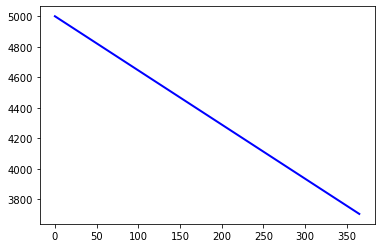

In [16]:
print('Calculate Daily Basis each Year')
print(dc.forecast(start=0,end=366,freq_input='D',freq_output='A'))
dc.plot(start=0,end=366,freq_input='D',freq_output='A',rate_kw=dict(color='blue',linestyle='-',linewidth=2))

Calculate Monthly Basis each Month
           rate    cumulative
0   5000.000000  0.000000e+00
1   4876.549560  1.481405e+05
2   4756.147123  2.926235e+05
3   4638.717432  4.335391e+05
4   4524.187090  5.709755e+05
5   4412.484513  7.050186e+05
6   4303.539882  8.357521e+05
7   4197.285104  9.632579e+05
8   4093.653765  1.087615e+06
9   3992.581094  1.208903e+06
10  3894.003915  1.327195e+06
11  3797.860616  1.442567e+06
12  3704.091103  1.555091e+06


/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


Text(0, 0.5, 'Rate [bbl/d]')

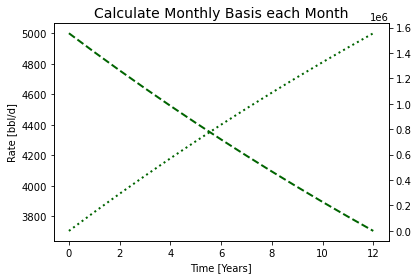

In [17]:
print('Calculate Monthly Basis each Month')
print(dc.forecast(start=0,end=13,freq_input='M',freq_output='M'))

fig, ax = plt.subplots()
dc.plot(start=0,end=13,freq_input='M',freq_output='M',cum=True,ax=ax)
ax.set_title('Calculate Monthly Basis each Month',fontsize=14)
ax.set_xlabel('Time [Years]')
ax.set_ylabel('Rate [bbl/d]')

In [18]:
print('Calculate Monthly Basis each Year')
print(dc.forecast(start=0,end=13,freq_input='M',freq_output='A'))

Calculate Monthly Basis each Year
           rate    cumulative
0   5000.000000  0.000000e+00
12  3704.091103  1.555091e+06


/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


In [19]:
print('Calculate Year Basis each Year')
print(dc.forecast(start=0,end=2,freq_input='A',freq_output='A'))

Calculate Year Basis each Year
          rate    cumulative
0  5000.000000  0.000000e+00
1  3704.091103  1.576689e+06


/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


In [20]:
print('Calculate Year Basis each Year - Rate Limit')
print(dc.forecast(start=0,end=15,freq_input='A',freq_output='A',rate_limit=500))


Calculate Year Basis each Year - Rate Limit
          rate    cumulative
0  5000.000000  0.000000e+00
1  3704.091103  1.576689e+06
2  2744.058180  2.744729e+06
3  2032.848299  3.610035e+06
4  1505.971060  4.251069e+06
5  1115.650801  4.725958e+06
6   826.494441  5.077765e+06
7   612.282141  5.338390e+06


/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


In [36]:
# Custom time list
print(dc.forecast(time_list=np.array([0,5,10,18]),freq_input='M'))

           rate    cumulative
0   5000.000000  0.000000e+00
5   4412.484513  7.050186e+05
10  3894.003915  1.327195e+06
18  3188.140758  2.174231e+06


/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


## Using Arps with dates

In [22]:
print('Example Arps Class')
#print(dca.time_converter_matrix)
qi = 5000
di = 0.3
b = 0
ti = date(2021,1,1)
di_f = 'A'
dc1 = dca.Arps(qi,di,b,ti,freq_di=di_f)
print(dc1)

Example Arps Class
Declination 
 Ti: 2021-01-01 
 Qi: 5000 bbl/d 
 Rate: 0.3 A 
 b: 0


/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


Text(0, 0.5, 'Rate [bbl/d]')

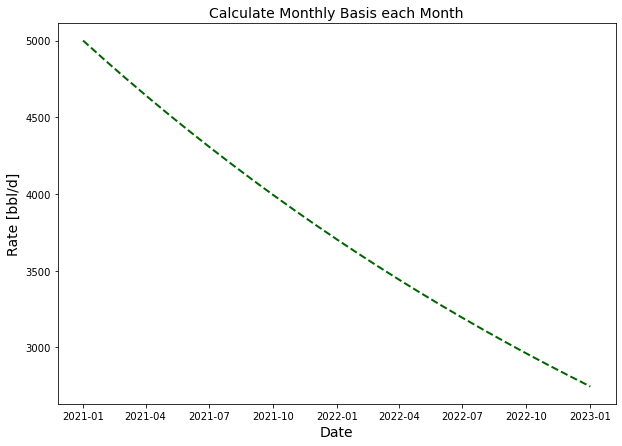

In [23]:
from_time = date(2021,1,1)
to_time = date(2023,1,1)



fig, ax = plt.subplots(figsize=(10,7))
dc1.plot(start=from_time,end=to_time,ax=ax)
ax.set_title('Calculate Monthly Basis each Month',fontsize=14)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Rate [bbl/d]',fontsize=14)

/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


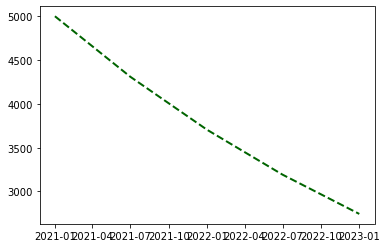

In [24]:
dc1.plot(start=from_time,end=to_time,freq_output='6M')

In [25]:
dc1.forecast(start=from_time,end=to_time,freq_output='6M')

/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,rate,cumulative
2021-01,5000.000000,0.000000e+00
2021-07,4308.848888,8.409005e+05
2022-01,3704.091103,1.576689e+06
2022-07,3192.073767,2.199644e+06
2023-01,2744.058180,2.744729e+06


In [26]:
dc1.forecast(start=from_time,end=to_time,freq_output='A')

/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,rate,cumulative
2021,5000.000000,0.000000e+00
2022,3704.091103,1.576689e+06
2023,2744.058180,2.744729e+06


In [27]:
dca.time_converter_matrix

to,A,D,M
from,,,
A,1.0,0.002740,0.083333
D,365.0,1.000000,30.000000
M,12.0,0.033333,1.000000


In [32]:
times = np.array([date(2021,1,1), date(2021,2,5), date(2021,6,17),date(2021,8,21)], dtype='datetime64')
print(times)
dc1.forecast(time_list=times)

['2021-01-01' '2021-02-05' '2021-06-17' '2021-08-21']


/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:74: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:97: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/dcapy/dcapy/dca/arps.py:98: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,rate,cumulative
2021-01,5000.000000,0.000000
2021-02,4874.212049,153042.007242
2021-06,4416.415187,710028.188922
2021-08,4200.448634,972787.495873


In [29]:
times = pd.Series(np.array([date(2021,1,1), date(2021,1,5), date(2021,6,17),date(2021,8,21)], dtype='datetime64'))
print(times.dt.to_period('M'))

0    2021-01
1    2021-01
2    2021-06
3    2021-08
dtype: period[M]


In [56]:
sf = stats.norm
ss = stats.norm(loc=10,scale=2)

In [64]:
issubclass(type(ss),(stats.rv_continuous,stats.rv_discrete))

False

In [58]:
print(type(sf))
print(type(ss))

<class 'scipy.stats._continuous_distns.norm_gen'>
<class 'scipy.stats._distn_infrastructure.rv_frozen'>


In [61]:
isinstance(ss,stats.norm_gen)

AttributeError: module 'scipy.stats' has no attribute 'norm_gen'

In [69]:
isinstance(ss,stats._distn_infrastructure.rv_frozen)

True

In [90]:
type(stats.bernoulli)


scipy.stats._discrete_distns.bernoulli_gen

In [93]:
issubclass(type(stats.bernoulli(0.5)),(stats.rv_continuous,stats.rv_discrete))

False

In [95]:
type(stats.bernoulli(0.5))

scipy.stats._distn_infrastructure.rv_frozen

In [107]:
np.issubdtype(np.array([date(2020,1,1)]).dtype,(np.number))

False

In [100]:
np.array([2,4]).dtype

dtype('int64')